In [1]:
import numpy as np
import pandas as pd

# Pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn 
import torchvision.transforms as transforms

# Plots

# Visualisation libraries
## Text
from colorama import Fore, Back, Style
from IPython.display import display, Markdown, Latex

## matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

## seaborn
import seaborn as sns
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<font size="+2"><b>Tensor and Matrices</b></font>
</div>

A tensor is often referred to as an object that describes a relationship between a set of vector space objects. Similarly, in PyTorch mathematical matrices are called **tensors**.

For <font color='Blue'><b>example</b></font>, an array is defined as follows in NumPy.

In [2]:
A = np.random.randint(10, size=(3, 3))
display(Latex(r'Matrix $A$ ='))
display(A)

<IPython.core.display.Latex object>

array([[3, 5, 9],
       [1, 6, 5],
       [1, 1, 1]])

However, a tensor is defined as follows.

In [3]:
T = torch.Tensor(A)
display(Latex(r'Tensor $T$ ='))
display(T)

<IPython.core.display.Latex object>

tensor([[3., 5., 9.],
        [1., 6., 5.],
        [1., 1., 1.]])

The shape of $A$ and $T$

In [4]:
pd.DataFrame({'Object':['A','B'], 'Type': [type(A), type(T)], 'Shape': [A.shape, T.shape]}).style.hide_index()

Object,Type,Shape
A,,"(3, 3)"
B,,"torch.Size([3, 3])"


There are a lot of similarities between NumPy and torch. For example, we could

In [5]:
T = torch.randint(10, size=(3, 3))
display(Latex(r'Tensor $T$ ='))
display(T)
display(Latex(r'Matrix $A$ ='))
A = np.array(T)
display(A)

<IPython.core.display.Latex object>

tensor([[8, 9, 6],
        [9, 3, 3],
        [9, 6, 1]])

<IPython.core.display.Latex object>

array([[8, 9, 6],
       [9, 3, 3],
       [9, 6, 1]], dtype=int64)

Some other similarities:

In [6]:
print(Fore.BLUE+ Style.BRIGHT + 'Numpy ones:')
display(np.ones((2,2)))

print(Fore.RED+ Style.BRIGHT + 'Toruch ones:')
display(torch.ones((2,2)))

print(Fore.BLUE+ Style.BRIGHT + 'Tensor to Array:')
display(np.asarray(T))

print(Fore.RED+ Style.BRIGHT + 'Array to Tensor:')
display(torch.from_numpy(A))

Numpy ones:


array([[1., 1.],
       [1., 1.]])

Toruch ones:


tensor([[1., 1.],
        [1., 1.]])

Tensor to Array:


array([[8, 9, 6],
       [9, 3, 3],
       [9, 6, 1]], dtype=int64)

Array to Tensor:


tensor([[8, 9, 6],
        [9, 3, 3],
        [9, 6, 1]])

See this [link](https://pytorch.org/tutorials/) for more details.

<div class="alert alert-block alert-success">
<font size="+2"><b>
Basic (Matrix) Algebra with Torch    
</b></font>
</div>

Let $S$ and $T$ be two tensors

In [7]:
S = torch.randint(10, size=(4, 4))
T = torch.randint(10, size=(4, 4))
print(Fore.BLUE+ Style.BRIGHT + 'S=')
display(S)

print(Fore.RED+ Style.BRIGHT + 'T=')
display(T)

S=


tensor([[8, 1, 3, 5],
        [9, 9, 6, 7],
        [5, 8, 6, 5],
        [3, 6, 2, 2]])

T=


tensor([[7, 1, 9, 1],
        [4, 5, 7, 6],
        [3, 0, 8, 9],
        [9, 6, 9, 5]])

* **Addition**: ```torch.add(S,T)``` or ```S.add(T)```or ```S + T```
* **Subtraction**: ```torch.sub(S,T)``` or```S.sub(T)``` or  ```S - T```
* **Element wise Multiplication**: ```torch.mul(S,T)``` or  ```S * T ```
* **Element wise Division**: ```torch.div(S,T)``` or ```S / T ```

In [8]:
print(Fore.BLUE+ Style.BRIGHT + 'Addition:')
display(torch.add(S,T))
display(S.add(T))
display(S+T)

Addition:


tensor([[15,  2, 12,  6],
        [13, 14, 13, 13],
        [ 8,  8, 14, 14],
        [12, 12, 11,  7]])

tensor([[15,  2, 12,  6],
        [13, 14, 13, 13],
        [ 8,  8, 14, 14],
        [12, 12, 11,  7]])

tensor([[15,  2, 12,  6],
        [13, 14, 13, 13],
        [ 8,  8, 14, 14],
        [12, 12, 11,  7]])

In [9]:
print(Fore.BLUE+ Style.BRIGHT + 'Subtraction:')
display(torch.sub(S,T))
display(S.sub(T))
display(S-T)

Subtraction:


tensor([[ 1,  0, -6,  4],
        [ 5,  4, -1,  1],
        [ 2,  8, -2, -4],
        [-6,  0, -7, -3]])

tensor([[ 1,  0, -6,  4],
        [ 5,  4, -1,  1],
        [ 2,  8, -2, -4],
        [-6,  0, -7, -3]])

tensor([[ 1,  0, -6,  4],
        [ 5,  4, -1,  1],
        [ 2,  8, -2, -4],
        [-6,  0, -7, -3]])

In [10]:
print(Fore.BLUE+ Style.BRIGHT + 'Element wise Multiplication:'  + Style.RESET_ALL )
display(torch.mul(S,T))
display(S.mul(T))
display(S*T)

print(Fore.BLUE+ Style.BRIGHT + 'Element wise Division:' + Style.RESET_ALL)
print(Fore.BLUE+ Style.BRIGHT + '- Dividing each entry of S by 2:' + Style.RESET_ALL)

display(torch.div(S,2))

print(Fore.BLUE+ Style.BRIGHT + '- Dividing each entry of S by corresponding entry of T:' + Style.RESET_ALL)

# Sometimes the kernel dies after running the following commands
# torch.div(S,T)
# display(S.div(T))
# display(S/T)

Element wise Multiplication:


tensor([[56,  1, 27,  5],
        [36, 45, 42, 42],
        [15,  0, 48, 45],
        [27, 36, 18, 10]])

tensor([[56,  1, 27,  5],
        [36, 45, 42, 42],
        [15,  0, 48, 45],
        [27, 36, 18, 10]])

tensor([[56,  1, 27,  5],
        [36, 45, 42, 42],
        [15,  0, 48, 45],
        [27, 36, 18, 10]])

Element wise Division:
- Dividing each entry of S by 2:


tensor([[4, 0, 1, 2],
        [4, 4, 3, 3],
        [2, 4, 3, 2],
        [1, 3, 1, 1]])

- Dividing each entry of S by corresponding entry of T:


<div class="alert alert-block alert-success">
<font size="+2"><b>
Mean and Standard Deviation
</b></font>
</div>

Let $T$ be a tensor.

* Mean: ```T.mean()```
* Standart Deviation (std): ```T.std()```

In [11]:
T = torch.rand(4,4)
print(Fore.RED+ Style.BRIGHT + 'T:'+ Style.RESET_ALL)
display(T)
print(Fore.RED+ Style.BRIGHT + 'Mean:'+ Style.RESET_ALL)
display(T.mean())

print(Fore.RED+ Style.BRIGHT + 'STD:'+ Style.RESET_ALL)
display(T.std())

T:


tensor([[0.6724, 0.9165, 0.2126, 0.0555],
        [0.4323, 0.5642, 0.5795, 0.9820],
        [0.6948, 0.5777, 0.0943, 0.7661],
        [0.5435, 0.4215, 0.0177, 0.1391]])

Mean:


tensor(0.4794)

STD:


tensor(0.3027)

See more details [here](https://pytorch.org/docs/stable/torch.html).

<div class="alert alert-block alert-success">
<font size="+2"><b>
Linear Regression
</b></font>
</div>


Let's try a linear regression using Pytorch.

To do a linear regression using Pytorch, we need to do the following steps.

1. Defining a class for **LinearRegression**. This class is common when it comes to doing linear regression using Pytorch.

In [12]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_Size, output_Size):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_Size, output_Size)

    def forward(self, x):
        out = self.linear(x)
        return out

2. Preparing the data and defining a model using the **LinearRegression** class.

---------------------------------------------------------
Step = 0, MSE = 2.3664e+02
Step = 10, MSE = 3.7804e-03
Step = 20, MSE = 4.2227e-04
Step = 30, MSE = 3.5668e-04
Step = 40, MSE = 3.0132e-04
Step = 50, MSE = 2.5455e-04
Step = 60, MSE = 2.1504e-04
Step = 70, MSE = 1.8165e-04
Step = 80, MSE = 1.5346e-04
Step = 90, MSE = 1.2963e-04
Step = 100, MSE = 1.0951e-04
---------------------------------------------------------


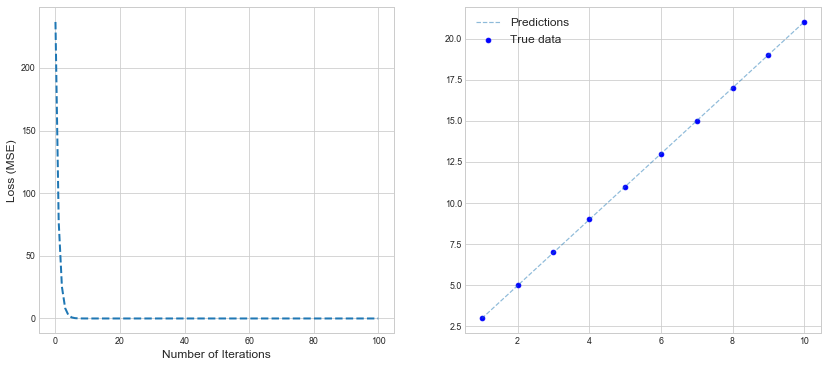

In [13]:
N = 10
X = np.linspace(1,N,N)
X = np.array(X,dtype=np.float32)
X = X.reshape(-1,1)
# y = 2x +1
y = np.dot(X,2) +1
y = np.array(y,dtype=np.float32)
y = y.reshape(-1,1)

if torch.cuda.is_available():
    X_tensor = Variable(torch.from_numpy(X).cuda())
    y_tensor = Variable(torch.from_numpy(y).cuda())
else:
    X_tensor = Variable(torch.from_numpy(X))
    y_tensor = Variable(torch.from_numpy(y))

# Defining model
input_Size, output_Size = 1, 1
model = LinearRegressionModel(input_Size, output_Size) # input and output size are 1

# GPU
if torch.cuda.is_available():
    model.cuda()

# MSE
MSE = nn.MSELoss()

# Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

loss_list = []
iteration_number = 101
print('---------------------------------------------------------')
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward modeling
    results = model(X_tensor)
    
    # Calculate Loss using MSE
    loss = MSE(results, y_tensor)
    
    # backward
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 10 == 0):
        print('Step = %i, MSE = %.4e' % (iteration, loss.data))
print('---------------------------------------------------------')

with torch.no_grad():
    if torch.cuda.is_available():
        Predicted = model(Variable(torch.from_numpy(X).cuda())).cpu().data.numpy()
    else:
        Predicted = model(Variable(torch.from_numpy(X))).data.numpy()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
_ = ax[0].plot(range(iteration_number), loss_list, linestyle='dashed', linewidth=2)
_ = ax[0].set_xlabel("Number of Iterations")
_ = ax[0].set_ylabel("Loss (MSE)")
    
_ = ax[1].scatter(X, y, label='True data', alpha=1, facecolor='blue')
_ = ax[1].plot(X, Predicted, '--', label='Predictions', alpha=0.5)
_ = ax[1].legend(loc='Best', fontsize=12)

***